# 중간 점검

## 1. 선형대수학

### 1)	다음 행렬 A의 Gauss Elimination을 구현하고, rank를 알아낼 것(직접 혹은 library들의 함수 사용), 그 후 A가 singular 한지 nonsingular 한지 판단할 것

In [1]:
# Import libraries for 1-1)
import numpy as np
from scipy.linalg import lu

In [2]:
A = np.array([[2, 3, 0], [4, 5, 1], [2, -1, -3]])
_, U = lu(A, permute_l = True)

In [3]:
U # The result of Gauss Elimination of A

array([[ 4. ,  5. ,  1. ],
       [ 0. , -3.5, -3.5],
       [ 0. ,  0. , -1. ]])

In [4]:
np.linalg.det(A) # Floating point error

14.000000000000004

In [5]:
np.linalg.det(U) # Floating point error

14.000000000000004

The result of Gauss Elimination of A is
\begin{bmatrix}
4 & 5 & 1\\
0 & -3.5 & -3.5\\
0 & 0 & -1
\end{bmatrix}
And
$$rank(A)=3$$
By the value of matrix determination of A and the existence of pivots, A is a non-singular matrix.

### 2) A의 열벡터들이 선형 독립인지 선형 종속인지 판단할 것

By the result of Question 1.1., the matrix A has a trivial solution.
So, column vectors of A are linearly independent.

### 3)	식의 해를 구할 것(back-substitution 사용) (singular 하다면 해를 구하지 않아도 됨)

$$\left[
\begin{array}{ccc|c}
2 & 3 & 0 & 0 \\
4 & 5 & 1 & 3 \\   
2 & -1 & -3 & 5 \\
\end{array}
\right]$$

1. $$l_2 - l_1 \times 2 \rightarrow l_2$$
$$\left[
\begin{array}{ccc|c}
2 & 3 & 0 & 0 \\
0 & -1 & 1 & 3 \\   
2 & -1 & -3 & 5 \\
\end{array}
\right]$$

2. $$l_3 - l_1 \rightarrow l_2$$
$$\left[
\begin{array}{ccc|c}
2 & 3 & 0 & 0 \\
0 & -1 & 1 & 3 \\   
0 & -4 & -3 & 5 \\
\end{array}
\right]$$

3. $$l_3 - l_2 \times 4 \rightarrow l_3$$
$$\left[
\begin{array}{ccc|c}
2 & 3 & 0 & 0 \\
0 & -1 & 1 & 3 \\   
0 & 0 & -7 & -7 \\
\end{array}
\right]$$

$$-7z=-7, z=1$$
$$-y+z=-y+1=3, y=-2$$
$$2x+3y=2x-6=0, x=3$$

$$\therefore x=3, y=-2, z=1$$

In [6]:
# Check the solution
b = np.array([0, 3, 5])
x = np.linalg.solve(A, b)
x

array([ 3., -2.,  1.])

### 4)	A의 determinant를 구할 것

$$det(A) = 2 \times (5 \times (-3) - 1 \times (-1)) - 3 \times (4 \times (-3) - 1 \times 2) + 0 = 14$$

### 5)	A의 eigenvalue, eigenvector를 구할 것

$$\begin{vmatrix}
2-\lambda & 3 & 0\\
4 & 5-\lambda & 1\\
2 & -1 & -3-\lambda
\end{vmatrix}$$

\begin{align}
&=(2-\lambda)((5-\lambda)(-3-\lambda)+1)-3(4(-3-\lambda)-2) \\ &=-\lambda^3 + 4\lambda^2 + 22\lambda + 14 \\ 
&=0 &&
\end{align}

In [7]:
# Import a library for 1-5)
import sympy as sym
import cmath

In [8]:
l = sym.Symbol('l')
eq = -(l ** 3) + 4 * (l ** 2) + 22 * l + 14
eq = sym.Eq(eq, 0)
result = sym.solve(eq)
result

[4/3 + (-1/2 - sqrt(3)*I/2)*(649/27 + sqrt(1607)*I/3)**(1/3) + 82/(9*(-1/2 - sqrt(3)*I/2)*(649/27 + sqrt(1607)*I/3)**(1/3)),
 4/3 + 82/(9*(-1/2 + sqrt(3)*I/2)*(649/27 + sqrt(1607)*I/3)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(649/27 + sqrt(1607)*I/3)**(1/3),
 4/3 + 82/(9*(649/27 + sqrt(1607)*I/3)**(1/3)) + (649/27 + sqrt(1607)*I/3)**(1/3)]

In [9]:
[complex(c).real for c in result]

[-0.762072500784623, -2.5220535026197273, 7.28412600340435]

In [10]:
# Check the solution
eig_val, eig_vec = np.linalg.eig(A)
eig_val, eig_vec

(array([ 7.284126 , -0.7620725, -2.5220535]),
 array([[-0.49368533, -0.53067579,  0.13230955],
        [-0.86956516,  0.48858834, -0.19943695],
        [-0.01145508, -0.69257826,  0.97093722]]))

## 2. 베이즈 법칙

### 1) 어떤 회사가 연휴 기간에 직원들에게 숙박시설을 제공하기 위해 3개의 지방 호텔을 사용하였다. 과거의 경험에 의하면, 직원의 20%가 x호텔에 예약하고, y호텔에 50%, z호텔에 30%의 예약을 하는 것으로 알고 있다. x호텔 객실의 5%, y호텔 객실의 4%, z호텔 객실의 8%의 비율로 방 안의 전기가 나갔다.

### 2) 어떤 직원이 전기가 나간 방에 예약할 확률을 구하여라

In [11]:
print(str((0.2 * 0.05 + 0.5 * 0.04 + 0.3 * 0.08) * 100) + "%")

5.4%


### 3) 전기가 나간 방에 숙박하게 된 직원이 z호텔을 예약했을 확률은?

In [12]:
print(str(((0.3 * 0.08) / (0.2 * 0.05 + 0.5 * 0.04 + 0.3 * 0.08)) * 100) + "%")

44.44444444444444%


## 3. 정규분포

### 1) 어떤 자판기에서 판매되는 음료수의 용량은 모평균이 150mL, 모표준편차가 5mL인 정규분포를 따른다고 한다, 이 자동판매기에서 100개를 임의로 추출하여 표본평균 x ̅ 를 구했을 때, P(149≤x ̅≤151)의 값을 구하여라.

$$\bar{N} ~ (150, ({{1}\over{2}})^2$$
$$149≤\bar{X}≤151$$
$$\rightarrow -2≤Z≤2$$
$$P(-2≤Z≤2)=0.9544$$

## 4. pandas, numpy

### 1) Titanic 데이터셋을 불러와서 age의 결측치 모두를 age의 결측치가 아닌 값들의 중앙값으로 채우고, age의 평균, 분산, 표준편차를 구하여라

In [13]:
# Import a library for 4-1)
import pandas as pd

In [14]:
df = pd.read_csv('/Users/seolyumin/Downloads/titanic/train.csv')

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
med = df.Age.median()
med

28.0

In [17]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [18]:
df.Age.fillna(med, inplace = True)

In [19]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 2) Titanic 데이터셋에서, 생존자 중 여자의 age 평균을 구하여라

In [20]:
df[(df.Survived == 1) & (df.Sex == 'female')].Age.mean()

28.716738197424892

## 5. pandas, numpy

### 1) Sigmoid 함수를 numpy로 구현하라

In [21]:
# Import libraries for 5-1)
import numpy as np
import matplotlib.pyplot as plt

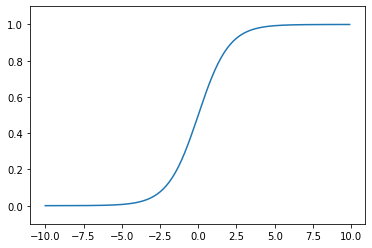

In [22]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2) MNIST 데이터를 받아서 훈련 데이터의 가장 첫 번째 이미지의 픽셀(28x28) 데이터 행렬을 벡터로 reshape하여라(1x784, 784x1 등 행벡터나 열벡터나 상관없고, 배열을 어떻게 펼치든지 상관 x)

In [23]:
# Import libraries for 5-2)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [25]:
first = x_train[0]
first = np.reshape(first, (784))

In [26]:
x_train[0].shape

(28, 28)

In [27]:
first.shape

(784,)

In [28]:
first

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 3) 2)의 방법으로 MNIST 데이터의 훈련 데이터 중 100개를 random으로 뽑아서 픽셀 데이터 행렬을 벡터로 변환하여라

In [29]:
indices = np.random.choice(x_train.shape[0], 100, replace=False)
X = np.reshape(np.array([x_train[i] for i in indices]), (100, 784))
np.shape(X), type(X)

((100, 784), numpy.ndarray)

### 4) W1 행렬을 784x100의 평균0, 표준편차1인 표준정규분포를 따르는 난수로 채워 정의하고, 이를 3)에서 만든 벡터들로 이루어진 100x784 행렬(X)과 곱하라[(X * W1) 순서로 곱하라]

In [30]:
W1 = np.random.normal(size=(784, 100))
W1

array([[-0.303969  , -0.19851223, -0.72228934, ..., -0.97606148,
         0.16511627,  0.19996621],
       [-0.69059382,  1.41970458,  0.10017014, ...,  2.00500148,
         0.03091593, -1.30460274],
       [-0.08600102,  0.97639316,  0.67094605, ..., -0.21009978,
        -1.33563314, -0.11076125],
       ...,
       [-0.26932737, -0.80728317, -1.43616962, ..., -0.69277659,
        -0.72891792,  0.54515657],
       [-1.29101071,  1.06746342,  1.3845103 , ...,  0.79570345,
         0.11681445, -0.26348742],
       [-0.40640382, -0.09482225, -0.86622545, ...,  0.53489695,
        -0.22385749, -1.62405151]])

In [31]:
X@W1

array([[  119.42272753,  2313.48203358,  1581.30609252, ...,
        -1990.2635638 ,   496.12750234, -4402.44847023],
       [ -910.99064434, -1320.32032634,  -913.54776802, ...,
        -2106.91143929,   939.05920831, -2145.12986501],
       [-4489.93979639,   459.26913996,   994.68979879, ...,
         3174.75572732,   933.07405831, -1706.24038823],
       ...,
       [-2144.26750615, -2536.05099689,  1667.59375183, ...,
          811.60179817,  -122.59681802,  -893.21922568],
       [-2248.9231715 ,  -687.31782554,   389.52921708, ...,
         2278.76771089,  -673.20696004, -2211.74458316],
       [ 1098.08548954,  1257.00043061,   636.20705872, ...,
         1328.99568805,  1011.40299747, -1589.71109207]])